### Se importan las librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from ydata_profiling import ProfileReport

# Se agrega estas lineas de codigo debido a que desde vsc no se puede visualizar los graficos, ignorar si se utiliza con jupyter notebook
#plt.switch_backend('TkAgg')
#sns.set(style="darkgrid")


### Se extrae e importan 2 df y se almacenan en variables diferentes, el cual se lee desde la wiki fandom del honkai. 

In [2]:
characterUrl = pd.read_html('https://honkai-star-rail.fandom.com/wiki/Character')
playableCharacters = characterUrl[1]
upcomingCharacters = characterUrl[2]

playableCharacters.head()

,Icon,Name,Rarity,Path,Combat Type
0,NaN,Arlan,NaN,Destruction,Lightning
1,NaN,Asta,NaN,Harmony,Fire
2,NaN,Bailu,NaN,Abundance,Lightning
3,NaN,Blade,NaN,Destruction,Wind
4,NaN,Bronya,NaN,Harmony,Wind


### Se dropean columnas no relevantes y/o vacias de los df

In [3]:
playableCharacters.drop(columns=['Icon', 'Rarity'], inplace=True)
upcomingCharacters.drop(columns=['Icon', 'Rarity'], inplace=True)
playableCharacters.head()

,Name,Path,Combat Type
0,Arlan,Destruction,Lightning
1,Asta,Harmony,Fire
2,Bailu,Abundance,Lightning
3,Blade,Destruction,Wind
4,Bronya,Harmony,Wind


In [4]:
upcomingCharacters.head()

,Name,Path,Combat Type
0,Argenti,Erudition,Physical
1,Dr. Ratio,The Hunt,Imaginary
2,Hanya,Harmony,Physical
3,Ruan Mei,Harmony,Ice
4,Xueyi,Destruction,Quantum


### Se modifica el codigo aca para agregar 1 columna a cada df, para poder diferenciar si son jugables o no actualmente para un posterior analisis

In [5]:
playableCharacters['Status'] = 'Playable'
upcomingCharacters['Status'] = 'Upcoming'

In [6]:
upcomingCharacters.head()

,Name,Path,Combat Type,Status
0,Argenti,Erudition,Physical,Upcoming
1,Dr. Ratio,The Hunt,Imaginary,Upcoming
2,Hanya,Harmony,Physical,Upcoming
3,Ruan Mei,Harmony,Ice,Upcoming
4,Xueyi,Destruction,Quantum,Upcoming


In [7]:
playableCharacters.head()

,Name,Path,Combat Type,Status
0,Arlan,Destruction,Lightning,Playable
1,Asta,Harmony,Fire,Playable
2,Bailu,Abundance,Lightning,Playable
3,Blade,Destruction,Wind,Playable
4,Bronya,Harmony,Wind,Playable


### Se unen los df para tener un consolidado con los personajes jugables y los proximos

In [8]:
characters_df = pd.concat([playableCharacters, upcomingCharacters], ignore_index=False)

In [9]:
characters_df

,Name,Path,Combat Type,Status
0,Arlan,Destruction,Lightning,Playable
1,Asta,Harmony,Fire,Playable
2,Bailu,Abundance,Lightning,Playable
3,Blade,Destruction,Wind,Playable
4,Bronya,Harmony,Wind,Playable
5,Clara,Destruction,Physical,Playable
6,Dan Heng,The Hunt,Wind,Playable
7,Dan Heng • Imbibitor Lunae,Destruction,Imaginary,Playable
8,Fu Xuan,Preservation,Quantum,Playable
9,Gepard,Preservation,Ice,Playable


In [10]:
characters_df2 = characters_df.reset_index(drop=True, inplace=False)

In [11]:
characters_df2

,Name,Path,Combat Type,Status
0,Arlan,Destruction,Lightning,Playable
1,Asta,Harmony,Fire,Playable
2,Bailu,Abundance,Lightning,Playable
3,Blade,Destruction,Wind,Playable
4,Bronya,Harmony,Wind,Playable
5,Clara,Destruction,Physical,Playable
6,Dan Heng,The Hunt,Wind,Playable
7,Dan Heng • Imbibitor Lunae,Destruction,Imaginary,Playable
8,Fu Xuan,Preservation,Quantum,Playable
9,Gepard,Preservation,Ice,Playable


Distribución según Path

<AxesSubplot:xlabel='Path', ylabel='count'>

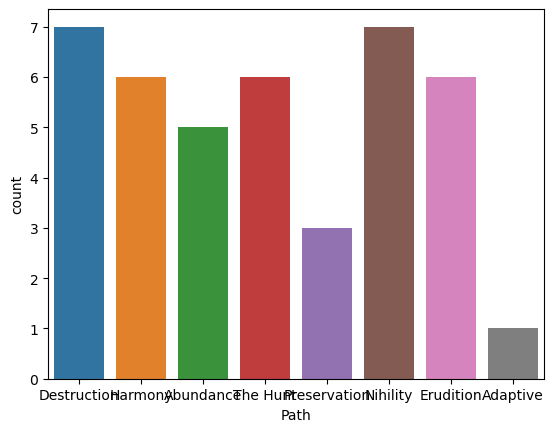

In [12]:
sns.countplot(x='Path',
            data=characters_df2)

Distribución segun Combat Type

<AxesSubplot:xlabel='Combat Type', ylabel='count'>

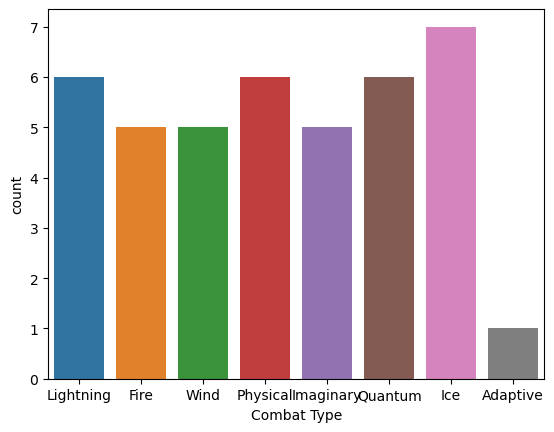

In [13]:
sns.countplot(x='Combat Type',
            data=characters_df2)

Jugabilidad

<AxesSubplot:xlabel='Status', ylabel='count'>

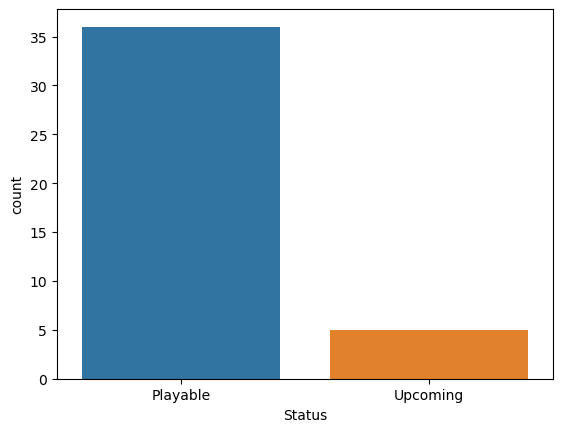

In [14]:
sns.countplot(x='Status',
            data=characters_df2)

### Se extrae mas informacion desde diferentes databases links para poder tener mas informacion relevante. En este caso se traen las estadisticas bases de cada personaje

In [15]:
statsUrl = pd.read_html('https://gamewith.net/honkai-starrail/article/show/38646')
statsCharacters = statsUrl[1]
statsCharacters.rename(columns={'Character': 'Name'}, inplace=True)
statsCharacters.head()

,Name,HP,ATK,DEF,SPD
0,Blade,1358,543,485,97
1,Luocha,1280,756,363,101
2,Yukong,917,599,374,107
3,Silver Wolf,1047,819,460,107
4,Jing Yuan,1164,698,485,99


### Se mergean los datos nuevos con el dataframe anterior

In [16]:
characters_df3 = pd.merge(characters_df2, statsCharacters, on='Name')
characters_df3.sample(5)

,Name,Path,Combat Type,Status,HP,ATK,DEF,SPD
25,Yukong,Harmony,Imaginary,Playable,917,599,374,107
20,Silver Wolf,Nihility,Quantum,Playable,1047,819,460,107
9,Himeko,Erudition,Fire,Playable,1047,756,436,96
21,Sushang,The Hunt,Physical,Playable,916,564,418,107
5,Clara,Destruction,Physical,Playable,1319,737,485,90


In [17]:
characters_df3.describe()

,HP,ATK,DEF,SPD
count,26.000000,26.000000,26.000000,26.000000
mean,1091.038462,612.923077,444.192308,101.961538
std,169.899613,86.456890,74.813913,6.089209
min,846.000000,476.000000,330.000000,90.000000
25%,936.250000,546.000000,396.000000,98.000000
50%,1047.000000,599.000000,438.500000,101.500000
75%,1230.500000,652.000000,485.000000,106.750000
max,1397.000000,819.000000,654.000000,115.000000


In [18]:
characters_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         26 non-null     object
 1   Path         26 non-null     object
 2   Combat Type  26 non-null     object
 3   Status       26 non-null     object
 4   HP           26 non-null     int64 
 5   ATK          26 non-null     int64 
 6   DEF          26 non-null     int64 
 7   SPD          26 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 1.8+ KB


In [32]:
characters_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         26 non-null     object
 1   Path         26 non-null     object
 2   Combat Type  26 non-null     object
 3   Status       26 non-null     object
 4   HP_x         26 non-null     int64 
 5   ATK_x        26 non-null     int64 
 6   DEF_x        26 non-null     int64 
 7   SPD_x        26 non-null     int64 
 8   HP_y         26 non-null     int64 
 9   ATK_y        26 non-null     int64 
 10  DEF_y        26 non-null     int64 
 11  SPD_y        26 non-null     int64 
dtypes: int64(8), object(4)
memory usage: 2.6+ KB


Se utiliza la libreria de ydata para obtener profile report, pero al parecer tiene varios bugs desde jupyter (esto no sucede desde vsc)

In [113]:
#profileData = ProfileReport(characters_df, title='Honkai Impact 3rd Characters Profile Report', explorative=True)
#profileData.to_file('HonkaiImpact3rdCharactersProfileReport.html')

# Arrancan las visualizaciones de datos para entender mas el dataset

### Se realizan varios scatterplots para ver si existe alguna relacion entre los stats de los personajes

Hay que tener en cuenta que solo hay informacion disponible de 26 de los 40 personajes totales

<AxesSubplot:xlabel='HP', ylabel='SPD'>

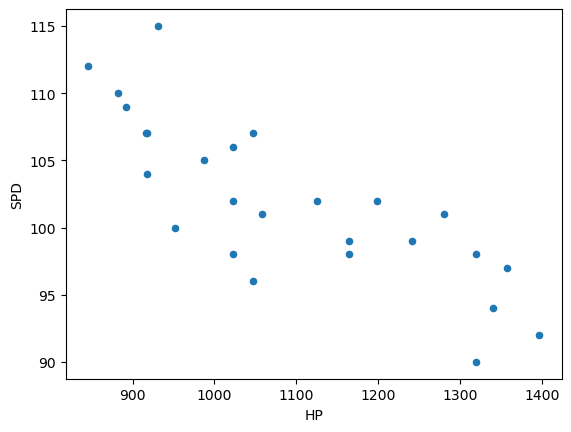

In [20]:
characters_df3.plot.scatter(x='HP', y='SPD')

<AxesSubplot:xlabel='HP', ylabel='DEF'>

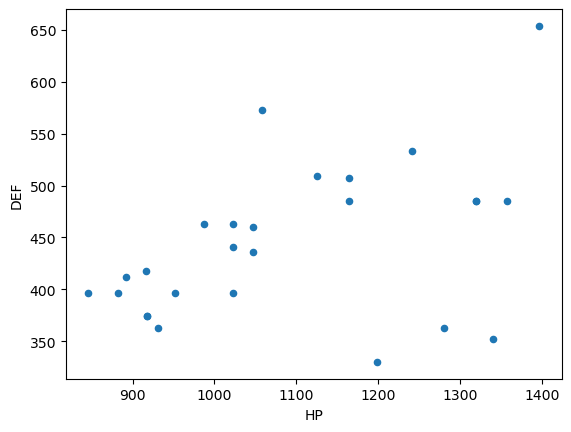

In [21]:
characters_df3.plot.scatter(x='HP', y='DEF')

<AxesSubplot:xlabel='ATK', ylabel='SPD'>

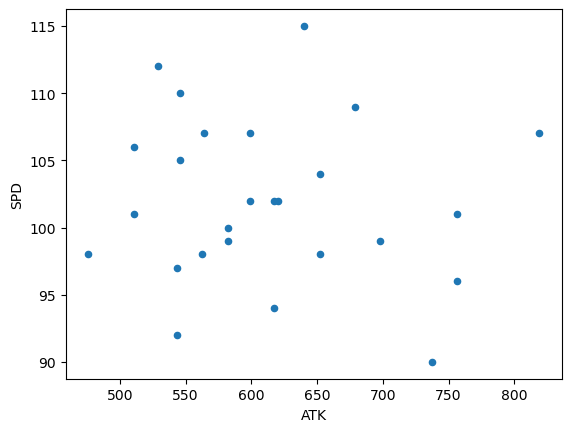

In [22]:
characters_df3.plot.scatter(x='ATK', y='SPD')

<AxesSubplot:xlabel='HP', ylabel='ATK'>

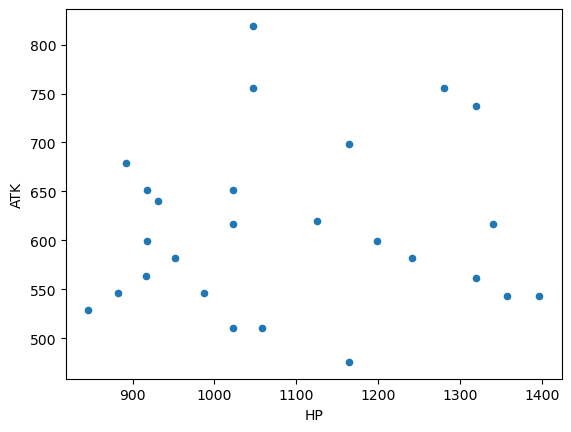

In [23]:
characters_df3.plot.scatter(x='HP', y='ATK')

<AxesSubplot:xlabel='DEF', ylabel='SPD'>

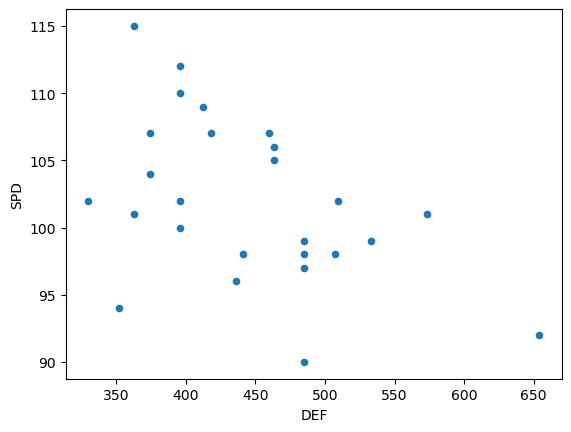

In [24]:
characters_df3.plot.scatter(x='DEF', y='SPD')

Se puede observar que hay una alta correlacion entre SPD Y HP. Al ser mayor la velocidad de un personaje, menor es su cantidad de vida base. Al ser mayor su vida, su movimiento sera menor.

<AxesSubplot:xlabel='SPD', ylabel='HP'>

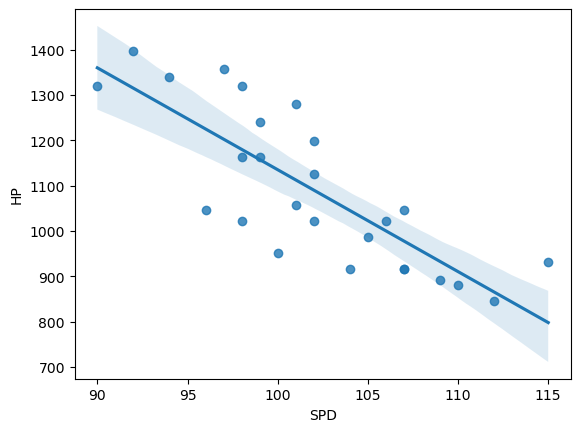

In [37]:
sns.regplot(x='SPD', y='HP', data=characters_df3)

<AxesSubplot:xlabel='SPD', ylabel='HP'>

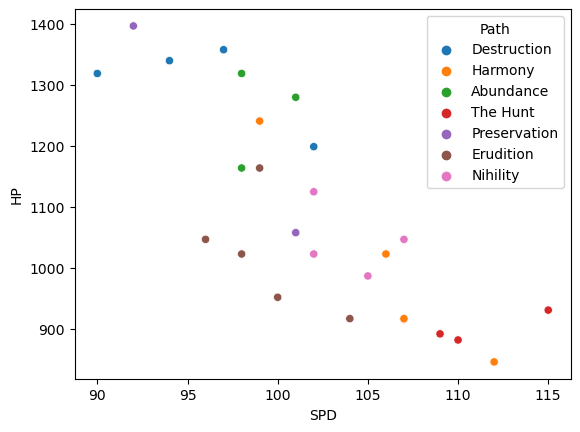

In [38]:
sns.scatterplot(x='SPD', y='HP', hue='Path', data=characters_df3)

In [123]:
# Se agrega esta linea de codigo debido a que desde vsc no se puede visualizar los graficos, ignorar si se utiliza con jupyter notebook
#plt.show()

### Visualizaciones para ver si existe alguna relacion entre los personajes jugables y los proximos

<AxesSubplot:xlabel='Path', ylabel='count'>

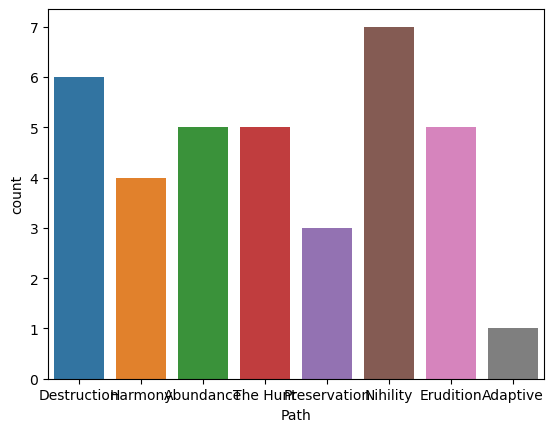

In [28]:
sns.countplot(x='Path',
            data=playableCharacters
            )

<AxesSubplot:xlabel='Path', ylabel='count'>

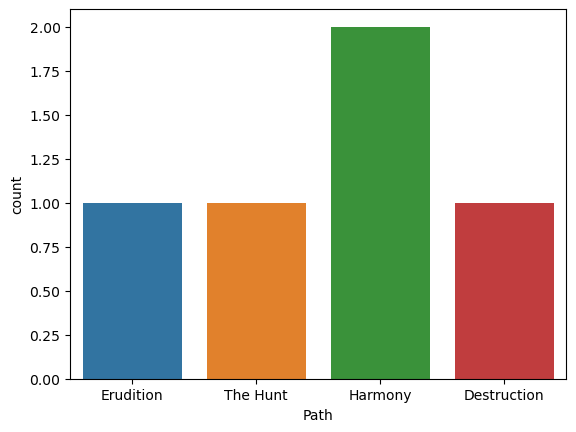

In [29]:
sns.countplot(x='Path',
            data=upcomingCharacters
            )

Segun Combat Type

<AxesSubplot:xlabel='Combat Type', ylabel='count'>

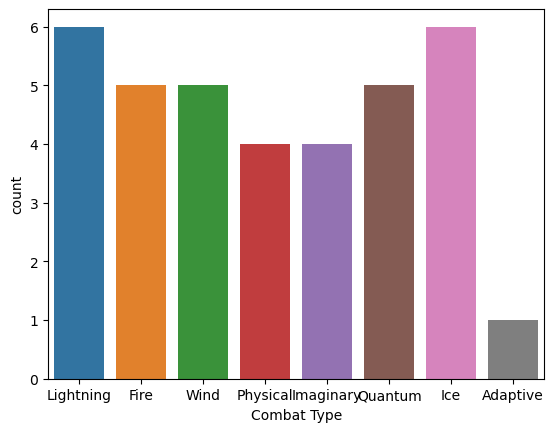

In [32]:
sns.countplot(x='Combat Type',
            data=playableCharacters
            )

<AxesSubplot:xlabel='Combat Type', ylabel='count'>

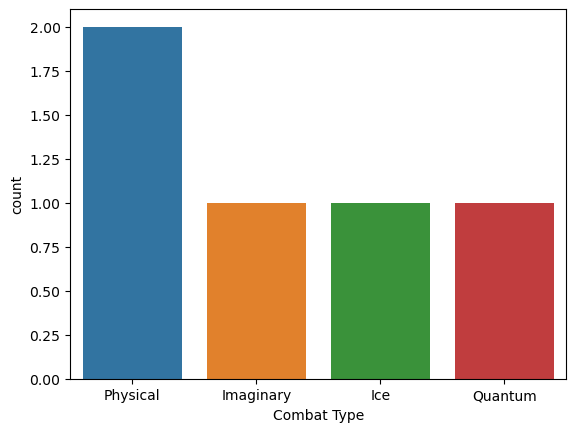

In [31]:
sns.countplot(x='Combat Type',
            data=upcomingCharacters
            )